In [117]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')

In [118]:
data = pd.read_csv('Datasets/ab.csv')

In [119]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,fractal_dimension_worst,Unnamed: 32,patient_age,hospital_code,room_number,admission_status,notes,genetic_marker,hospital_region,blood_pressure
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,0.11890,NaN,50,H003,453,Admitted,not useful,NaN,North,NaN
1,842517,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.08902,NaN,38,H001,258,Admitted,not useful,NaN,South,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.08758,NaN,50,H003,227,Admitted,not useful,NaN,North,NaN
3,84348301,M,11.42,20.38,77.58,NaN,0.14250,0.28390,0.2414,0.10520,...,0.17300,NaN,32,H002,487,ADMITTED,not useful,NaN,South,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.07678,NaN,76,H002,217,Discharged,not useful,NaN,North,NaN


In [120]:
df = data
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,fractal_dimension_worst,Unnamed: 32,patient_age,hospital_code,room_number,admission_status,notes,genetic_marker,hospital_region,blood_pressure
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,0.11890,NaN,50,H003,453,Admitted,not useful,NaN,North,NaN
1,842517,Malignant,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,0.08902,NaN,38,H001,258,Admitted,not useful,NaN,South,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,0.08758,NaN,50,H003,227,Admitted,not useful,NaN,North,NaN
3,84348301,M,11.420,20.38,77.58,NaN,0.14250,0.28390,0.24140,0.10520,...,0.17300,NaN,32,H002,487,ADMITTED,not useful,NaN,South,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,0.07678,NaN,76,H002,217,Discharged,not useful,NaN,North,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,891923,B,13.770,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,...,0.06794,NaN,61,H003,435,Discharged,not useful,NaN,North,104.0
575,864496,B,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,...,0.10170,NaN,75,H001,231,Admitted,not useful,NaN,North,NaN
576,878796,M,23.290,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,...,0.08762,NaN,36,H004,204,Discharged,not useful,G1,North,NaN
577,8910506,B,12.870,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,...,0.07062,NaN,64,H003,208,Discharged,not useful,NaN,North,108.0


In [121]:
df.shape

(579, 41)

In [122]:
df.info

<bound method DataFrame.info of            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          M       17.990         10.38          122.80   
1      842517  Malignant       20.570         17.77          132.90   
2    84300903          M       19.690         21.25          130.00   
3    84348301          M       11.420         20.38           77.58   
4    84358402          M       20.290         14.34          135.10   
..        ...        ...          ...           ...             ...   
574    891923          B       13.770         13.27           88.06   
575    864496          B        8.726         15.83           55.84   
576    878796          M       23.290         26.67          158.90   
577   8910506          B       12.870         16.21           82.38   
578     89827     Benign       11.060         14.96           71.49   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27

In [123]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,patient_age,room_number,blood_pressure
count,5.790000e+02,522.000000,551.000000,579.000000,493.000000,561.000000,579.000000,579.000000,579.000000,579.000000,...,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,0.0,579.000000,579.000000,145.000000
mean,2.987499e+07,13.875678,19.259020,91.920674,1664.328195,0.096377,0.103981,0.088484,0.048763,0.181091,...,0.132282,0.253164,0.271435,0.114342,0.290122,0.083831,NaN,50.345423,301.647668,111.441379
std,1.239915e+08,4.252310,4.278078,24.335227,9969.944083,0.014093,0.052780,0.080075,0.038888,0.027315,...,0.022848,0.156682,0.208617,0.065727,0.061585,0.017996,NaN,16.993023,114.938212,16.674113
min,8.670000e+03,-10.000000,9.710000,43.790000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,...,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN,20.000000,101.000000,80.000000
25%,8.691040e+05,11.547500,16.175000,75.190000,419.800000,0.086050,0.063750,0.029520,0.020220,0.161900,...,0.116600,0.146600,0.114450,0.064530,0.250550,0.071270,NaN,35.000000,204.500000,97.000000
50%,9.056800e+05,13.275000,18.770000,86.180000,553.500000,0.095860,0.092180,0.059990,0.033340,0.179200,...,0.131300,0.211800,0.226400,0.099750,0.282300,0.079990,NaN,51.000000,305.000000,112.000000
75%,8.812860e+06,15.772500,21.710000,103.950000,807.200000,0.105400,0.130350,0.128250,0.073520,0.195650,...,0.146000,0.335800,0.380250,0.161300,0.318150,0.092045,NaN,64.000000,398.500000,125.000000
max,9.113205e+08,27.420000,39.280000,188.500000,99999.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN,79.000000,498.000000,139.000000


In [124]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                 57
texture_mean                28
perimeter_mean               0
area_mean                   86
smoothness_mean             18
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [125]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32',
       'patient_age', 'hospital_code', 'room_number', 'admission_status',
       'notes', 'genetic_marker', 'hospital_region', 'blood_pressure'],
      dtype='object')

Mapping the M to Malignant and B to Benign to make it bi clasiification problem

In [126]:
df['diagnosis'] = df['diagnosis'].map({"M":"Malignant", "B":"Benign"})

In [127]:
df['diagnosis'].value_counts()

diagnosis
Benign       344
Malignant    206
Name: count, dtype: int64

In [128]:
diagnosis_per = df['diagnosis'].value_counts(normalize = True)*100
diagnosis_per

diagnosis
Benign       62.545455
Malignant    37.454545
Name: proportion, dtype: float64

In [129]:
#Calculating class imbalance
diagnosis_counts = df['diagnosis'].value_counts()
total =len(df)
majority_class = diagnosis_counts.max()
minority_class = diagnosis_counts.min()
balance_ratio = minority_class/majority_class
print(f"/n The balance ratio is: {balance_ratio:.2f}")

/n The balance ratio is: 0.60


In [130]:
#Checking if the class is balanced or imbalanced
if balance_ratio < 0.5:
    print("Dataset is imbalanced!..")
else:
    print("Dataset is balanced!..")

Dataset is balanced!..


<Axes: xlabel='diagnosis', ylabel='count'>

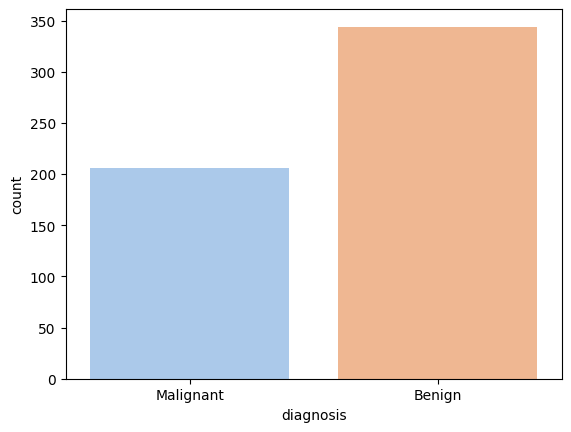

In [131]:
#visualizing the type of diagnosis against the number of counts it has
sns.countplot(x='diagnosis', data=df, palette='pastel')

In [132]:
#Dropping Columns with high missing values
high_missing_cols = ['genetic_marker', 'blood_pressure']
df.drop(columns=high_missing_cols, inplace = True)

In [133]:
df.shape

(579, 39)

In [134]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,patient_age,hospital_code,room_number,admission_status,notes,hospital_region
0,842302,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,0.2654,0.4601,0.11890,NaN,50,H003,453,Admitted,not useful,North
1,842517,NaN,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.1860,0.2750,0.08902,NaN,38,H001,258,Admitted,not useful,South
2,84300903,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.2430,0.3613,0.08758,NaN,50,H003,227,Admitted,not useful,North
3,84348301,Malignant,11.42,20.38,77.58,NaN,0.14250,0.28390,0.2414,0.10520,...,0.2575,0.6638,0.17300,NaN,32,H002,487,ADMITTED,not useful,South
4,84358402,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.1625,0.2364,0.07678,NaN,76,H002,217,Discharged,not useful,North


In [135]:
df.isnull().sum()

id                           0
diagnosis                   29
radius_mean                 57
texture_mean                28
perimeter_mean               0
area_mean                   86
smoothness_mean             18
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [136]:
#Dropping irrelevant columns from the dataset

irrelevant_columns =['id','Unnamed: 32','hospital_code', 'room_number','notes', 'admission_status', 'hospital_region']
df.drop(columns=irrelevant_columns, inplace=True)

In [137]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,patient_age
0,Malignant,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,50
1,NaN,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,38
2,Malignant,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,50
3,Malignant,11.420,20.38,77.58,NaN,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,32
4,Malignant,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Benign,13.770,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,...,16.93,94.17,661.1,0.1170,0.1072,0.03732,0.05802,0.2823,0.06794,61
575,Benign,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,...,19.62,64.48,284.4,0.1724,0.2364,0.24560,0.10500,0.2926,0.10170,75
576,Malignant,23.290,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,0.2200,...,32.68,177.00,1986.0,0.1536,0.4167,0.78920,0.27330,0.3198,0.08762,36
577,Benign,12.870,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,...,23.64,89.27,597.5,0.1256,0.1808,0.19920,0.05780,0.3604,0.07062,64


Encoding the target variable

In [138]:
df['diagnosis'] = df['diagnosis'].map({'Malignant': 1, 'Benign': 0})


In [139]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,patient_age
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,50
1,NaN,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,38
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,50
3,1.0,11.42,20.38,77.58,NaN,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,32
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,76


In [140]:
df['diagnosis'].value_counts()


diagnosis
0.0    344
1.0    206
Name: count, dtype: int64

In [141]:
df['diagnosis'].isnull().sum()

np.int64(29)

In [142]:
df.isnull().sum()

diagnosis                  29
radius_mean                57
texture_mean               28
perimeter_mean              0
area_mean                  86
smoothness_mean            18
compactness_mean            0
concavity_mean              0
concave points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                0
concave points_se           0
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
patient_age                 0
dtype: int64

Separating numeric and categorical columns

In [143]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.to_list()
numeric_cols

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'patient_age']

In [144]:
numeric_cols.remove('diagnosis')
numeric_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'patient_age']

In [145]:
#imputing missing values by diagnosis group mean 

# for col in numeric_cols:
#     if df[col].isnull().sum()>0:
#         df[col]=df.groupby('diagnosis')[col].transform(lambda x: x.fillna(x.mean()))

col1 = numeric_cols[0]
df[col1] = df.groupby('diagnosis')[col1].transform(lambda x : x.fillna(x.mean()) )
df[col1].isnull().sum()

np.int64(29)

In [146]:
#checking once again for the null values
df.isnull().sum()

diagnosis                  29
radius_mean                29
texture_mean               28
perimeter_mean              0
area_mean                  86
smoothness_mean            18
compactness_mean            0
concavity_mean              0
concave points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                0
concave points_se           0
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
patient_age                 0
dtype: int64

In [151]:
diagnosis_mode = df['diagnosis'].mode()[0]
df['diagnosis_temp'] = df['diagnosis'].fillna(diagnosis_mode)

for col in numeric_cols:
    if(df[col].isnull().sum()>0):
        df[col] = df.groupby('diagnosis_temp')[col].transform(lambda x: x.fillna(x.mean()))

df.drop('diagnosis_temp',axis=1, inplace=True)



In [152]:
df[numeric_cols].isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
patient_age                0
dtype: int64

EDA - correlation matrix and visualization


Correlation matrix calculated for 32 features
Matrix shape: (32, 32)


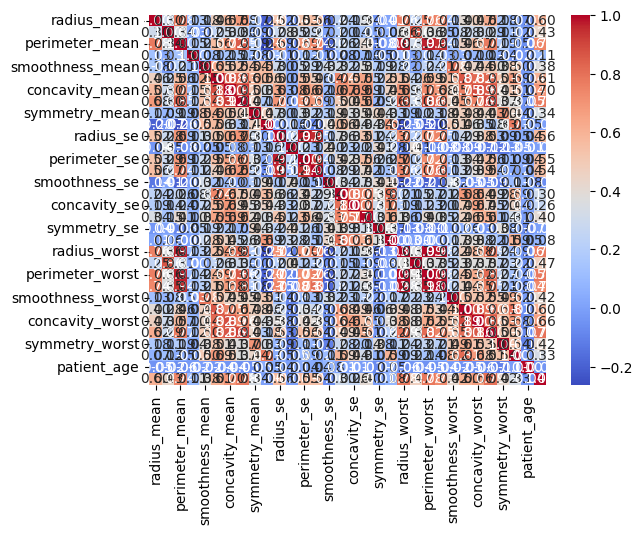

In [156]:
correlation_matrix = df[numeric_cols + ['diagnosis']].corr()
print(f"\nCorrelation matrix calculated for {len(numeric_cols) + 1} features")
print(f"Matrix shape: {correlation_matrix.shape}")

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


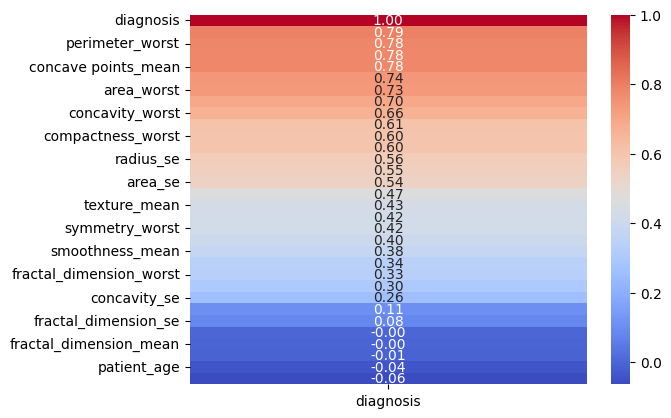

In [162]:
#checking the top 10 correlated numeric columns to the diagnosis
target_correlation = correlation_matrix['diagnosis'].sort_values(ascending=False)
sns.heatmap(target_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
target_correlation = target_correlation.drop('diagnosis')

In [163]:
#Getting the top numerical features related with malignant and top numericalfeatures related with benign
print("\nTop 15 Positive Correlations (Associated with Malignant):")
print(target_correlation.head(15))

print("\nTop 15 Negative Correlations (Associated with Benign):")
print(target_correlation.tail(15))


Top 15 Positive Correlations (Associated with Malignant):
concave points_worst    0.794635
perimeter_worst         0.782773
radius_worst            0.775858
concave points_mean     0.775530
perimeter_mean          0.740342
area_worst              0.732012
concavity_mean          0.695827
concavity_worst         0.664451
compactness_mean        0.605814
compactness_worst       0.601035
radius_mean             0.601003
radius_se               0.563589
perimeter_se            0.552988
area_se                 0.544740
texture_worst           0.468039
Name: diagnosis, dtype: float64

Top 15 Negative Correlations (Associated with Benign):
smoothness_worst           0.422864
symmetry_worst             0.422399
concave points_se          0.403803
smoothness_mean            0.377228
symmetry_mean              0.338542
fractal_dimension_worst    0.331136
compactness_se             0.301568
concavity_se               0.256537
area_mean                  0.105843
fractal_dimension_se       0.08286

Finding out the more correlated feature pairs using multicollinearity

In [166]:
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1,len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i,j])>0.9:
            high_corr_pairs.append({
                'Feature 1':correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation' : correlation_matrix.iloc[i,j]
            })
if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False)
    print("\nFeature pairs with correlation > 0.9 (potential multicollinearity):")
    print(high_corr_df.to_string(index=False))
    print(f"\nTotal pairs: {len(high_corr_pairs)}")
    print("\n Consider removing one feature from highly correlated pairs")
else:
    print("\n✓ No highly correlated feature pairs found")



Feature pairs with correlation > 0.9 (potential multicollinearity):
          Feature 1            Feature 2  Correlation
       radius_worst      perimeter_worst     0.993712
       radius_worst           area_worst     0.984080
    perimeter_worst           area_worst     0.977810
          radius_se         perimeter_se     0.972829
     perimeter_mean      perimeter_worst     0.970340
     perimeter_mean         radius_worst     0.969147
          radius_se              area_se     0.951691
     perimeter_mean           area_worst     0.941683
       perimeter_se              area_se     0.937945
     concavity_mean  concave points_mean     0.922955
concave points_mean concave points_worst     0.910927

Total pairs: 11

 Consider removing one feature from highly correlated pairs


In [167]:

df.drop(['perimeter_worst', 'area_worst', 'perimeter_se', 'area_se', 'concave points_mean'], axis=1, inplace=True)


In [175]:
df.isnull().sum()

diagnosis                  29
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean              0
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
smoothness_se               0
compactness_se              0
concavity_se                0
concave points_se           0
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
patient_age                 0
dtype: int64

In [178]:
df = df.dropna(subset='diagnosis')
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
patient_age                0
dtype: int64

In [180]:
df.shape

(550, 27)

Performing Standardization

In [183]:
#Again updating the numeric colmns as we have dropped some of the redundant columns based on multicollinearity
numeric_cols = df.select_dtypes(include=[np.number]).columns.to_list()
len(numeric_cols)

27

In [184]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,patient_age
0,1.292247,0.996894,-2.115452,1.268160,-0.058936,1.553748,3.242284,2.615329,2.210562,2.221557,...,0.899434,1.889263,-1.350817,1.295714,2.584714,2.078987,2.295561,2.760481,1.912906,-0.003968
2,1.292247,1.407538,0.471845,1.563864,-0.035027,0.926844,1.035253,1.340519,0.930417,-0.402414,...,0.290825,1.514440,-0.012910,0.520353,1.066720,0.838214,1.953939,1.150768,0.197650,-0.003968
3,1.292247,-0.590128,0.264766,-0.589020,0.136776,3.270609,3.360417,1.886689,2.861608,4.846930,...,2.030728,-0.278912,0.145354,3.369152,3.848346,1.960366,2.175078,6.079294,4.875721,-1.065652
4,1.292247,1.552472,-1.172885,1.773320,-0.023901,0.264320,0.527093,1.347967,-0.020549,-0.565010,...,0.494945,1.301143,-1.458502,0.215436,-0.315278,0.599075,0.726235,-0.884184,-0.393818,1.529576
5,1.292247,0.776645,-0.849176,-0.384081,-0.120945,2.223395,1.224642,0.848967,0.996253,1.859920,...,0.482563,-0.162944,-0.303334,2.031872,1.698850,1.241999,0.903146,1.756854,2.214117,-1.596495


In [185]:
#Performing Train-Test Split
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [187]:
X


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,patient_age
0,0.996894,-2.115452,1.268160,-0.058936,1.553748,3.242284,2.615329,2.210562,2.221557,2.464885,...,0.899434,1.889263,-1.350817,1.295714,2.584714,2.078987,2.295561,2.760481,1.912906,-0.003968
2,1.407538,0.471845,1.563864,-0.035027,0.926844,1.035253,1.340519,0.930417,-0.402414,1.215227,...,0.290825,1.514440,-0.012910,0.520353,1.066720,0.838214,1.953939,1.150768,0.197650,-0.003968
3,-0.590128,0.264766,-0.589020,0.136776,3.270609,3.360417,1.886689,2.861608,4.846930,0.321081,...,2.030728,-0.278912,0.145354,3.369152,3.848346,1.960366,2.175078,6.079294,4.875721,-1.065652
4,1.552472,-1.172885,1.773320,-0.023901,0.264320,0.527093,1.347967,-0.020549,-0.565010,1.256715,...,0.494945,1.301143,-1.458502,0.215436,-0.315278,0.599075,0.726235,-0.884184,-0.393818,1.529576
5,0.776645,-0.849176,-0.384081,-0.120945,2.223395,1.224642,0.848967,0.996253,1.859920,-0.255106,...,0.482563,-0.162944,-0.303334,2.031872,1.698850,1.241999,0.903146,1.756854,2.214117,-1.596495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,-0.346157,-0.539747,-0.547129,-0.081906,-1.497422,-1.315412,-0.943214,-1.253146,-1.016355,-0.100240,...,-0.313282,-0.695152,-0.880918,-2.106728,-1.309310,-1.192715,-1.320143,-1.638534,-1.350024,-1.537512
574,-0.022472,-1.427569,-0.158607,-0.108446,-0.328389,-0.796563,-0.977846,-0.814239,-0.524361,-0.667843,...,-0.748164,-0.328612,-1.416080,-0.673181,-0.931039,-1.121780,-0.867189,-0.136352,-0.877945,0.644839
575,-1.240879,-0.818233,-1.481879,-0.150085,1.311535,-0.425287,-0.596893,-0.605758,1.887954,-0.855972,...,0.003780,-1.372732,-0.977182,1.740022,-0.117580,-0.133527,-0.150697,0.031463,0.970939,1.470594
576,2.277139,1.761923,2.750783,0.022023,1.247420,1.944692,3.263284,1.409557,-0.080024,0.529596,...,0.524963,1.835421,1.153679,0.921101,1.017610,2.445762,2.416044,0.474623,0.199840,-0.829722


In [192]:
y= y.astype(int)

In [194]:
y.dtype

dtype('int64')

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [200]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print("\nConfusion Matrix is: ")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report is: ")
print(classification_report(y_test, y_pred))


Confusion Matrix is: 
[[68  1]
 [ 3 38]]

Classification Report is: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        69
           1       0.97      0.93      0.95        41

    accuracy                           0.96       110
   macro avg       0.97      0.96      0.96       110
weighted avg       0.96      0.96      0.96       110



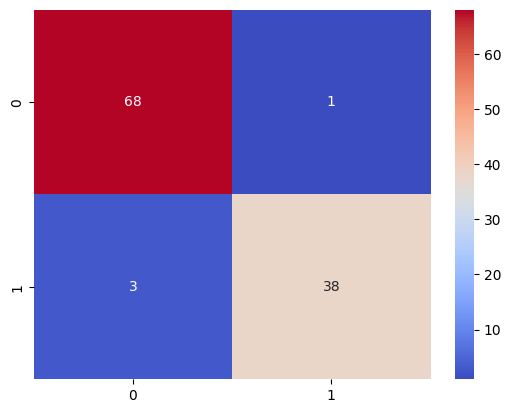

In [202]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.show()